In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# Remove warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv(r'C:\Users\Rog\Desktop\Housing\train.csv')

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.shape

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
display(housing.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Check Nulls

<AxesSubplot:>

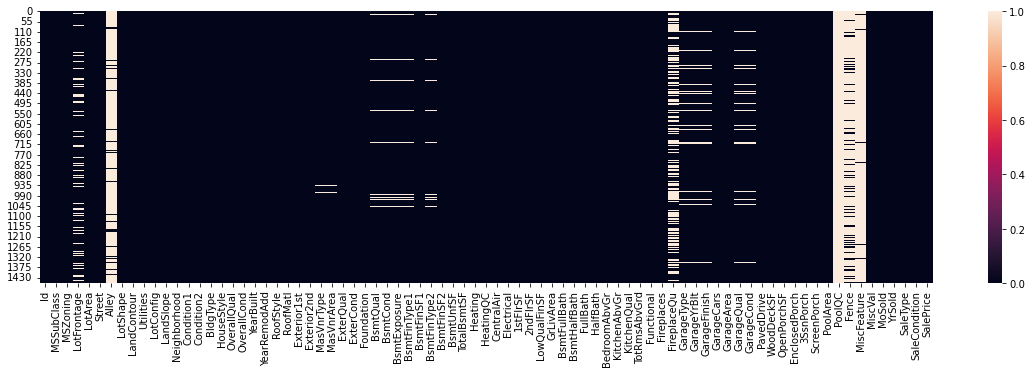

In [8]:
# Create heatmap to show missing values
plt.figure(figsize=(20,5))
sns.heatmap(housing.isnull())

In [120]:
# Check % of missing values
housing.isnull().mean()[housing.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

### Conclusion

There are **19 columns with null values**.

**Five of them have 47% or more nulls**: **PoolQC**, **MiscFeature**, **Alley**, **Fence** and **FireplaceQu**. According to the documentation, for all of these columns, NA means the house has no such feature.

Columns starting with **Garage** have the same % of missing values. Probably the ones with no garage.<br>
Columns starting with **Bsmt** (Basement) have similar % of missing values but not exactly the same. Most of them probably have no basement.<br>
Columns starting with **MasVnr** have the same %, MasVnrType already has a type "None", meaning the values are just missing.<br>
**LotFrontage** just has nulls, maybe we can fill in with mean later.<br>
**Electrical** has only 1 missing value, we can potentially fill in with "SBrkr" - the most popular value.

### Check Correlations

<AxesSubplot:xlabel='Val', ylabel='Col'>

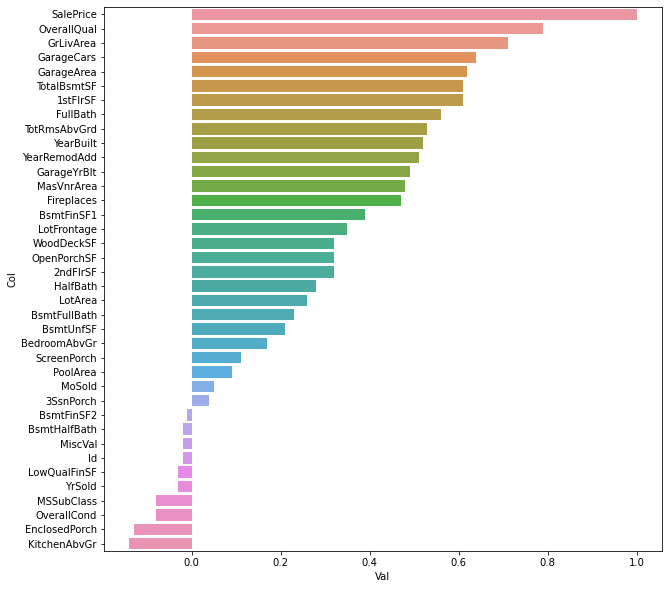

In [115]:
# Check Correlations for target variable
salescorr = housing.corr()['SalePrice']

corr = pd.DataFrame({'Col' : salescorr.index, 'Val' : np.round(salescorr.values,2)})
corr.sort_values('Val',ascending = False, inplace = True)

plt.figure(figsize=(10,10))
sns.barplot(data = corr, x = 'Val', y = 'Col')

<AxesSubplot:>

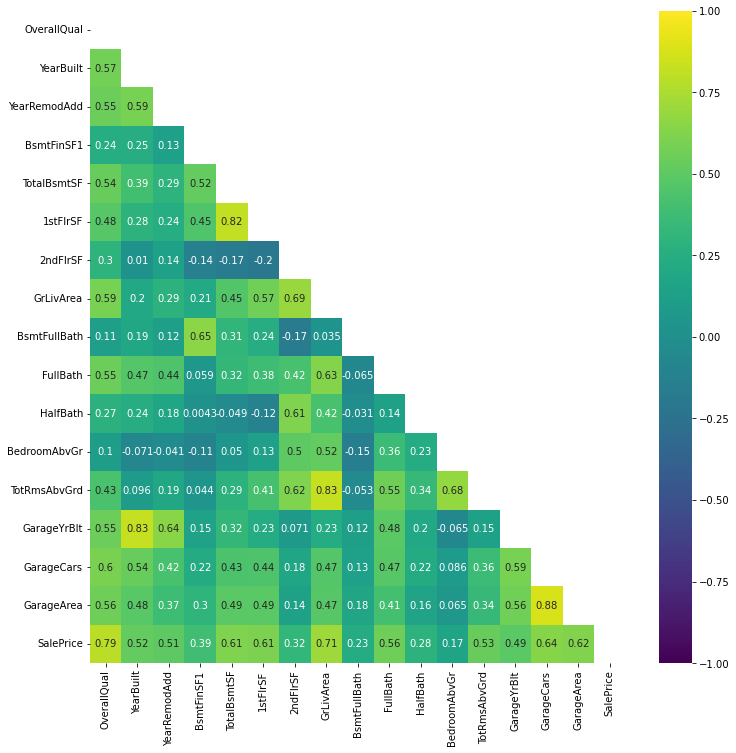

In [99]:
# Check all correlations above 0.6
corr = housing.corr()
cols = corr[corr[(corr > 0.6) | (corr < -0.6)].sum() > 1].index
corr = corr.loc[cols][cols]
matrix = np.triu(corr.loc[cols][cols])

plt.figure(figsize = (12, 12))
sns.heatmap(corr, cmap = 'viridis', annot = True, vmin = -1, vmax = 1, mask = matrix)

 ### Conclusion
 Let's look at **SalePrice** correlations first:
 * **OverallQual** - 0.79
 * **GrLivArea** - 0.71
 * **GarageCars** - 0.64
 * **GarageArea** - 0.62
 * **TotalBsmtSF** - 0.61
 * **1stFlrSF** - 0.61

Let's check other high correlations to avoid multicolinearity later:
* **GarageCars & GarageArea** - makes sense, larger area can fit more cars
* **GrLivArea & TotRmsAbvGr** - also makes sense, more area most likely means more rooms
* **GrLivArea & 2ndFlrSf** - same as above
* **YearBuilt & GarageYrBuilt** - garage was likely built when house was built or remodeled

Most of high correlations are logical

### Feature Distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

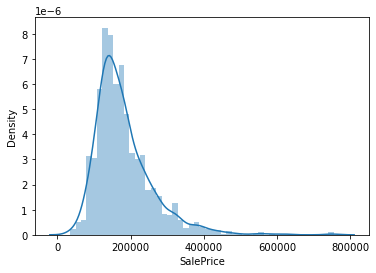

In [101]:
# SalePrice Distribution
sns.distplot(housing['SalePrice'])

**SalePrice** is right skewed, we'll use np.log1p to normalize it later

In [208]:
# Check other features skew

num_features = housing.select_dtypes(exclude = 'object').columns
skew = housing.skew()
df = pd.concat([salescorr, skew, housing.isnull().mean()], axis = 1)
df.columns = ['Corr', 'Skew', 'Nulls']
df = df.loc[num_features]

df.sort_values(by = 'Corr', ascending = False, inplace = True)
df.drop('SalePrice', inplace = True)

df['SkewType'] = df['Skew'].apply(lambda x: 'High' if x < -1 or x > 1 else ('Avg' if x < -0.5 or x > 0.5 else 'Low'))
df['CorrType'] = df['Corr'].apply(lambda x: 'High' if x < -0.5 or x > 0.5 else ('Avg' if x < -0.2 or x > 0.2 else 'Low'))


Features with **High or Avg Correlation and High Skew**.

These are the features we should analyze closely, normalize and remove outliers from

In [217]:
df[(df['SkewType'] == 'High') & (df['CorrType'] != 'Low')]

,Corr,Skew,Nulls,SkewType,CorrType
GrLivArea,0.708624,1.366560,0.000000,High,High
TotalBsmtSF,0.613581,1.524255,0.000000,High,High
1stFlrSF,0.605852,1.376757,0.000000,High,High
MasVnrArea,0.477493,2.669084,0.005479,High,Avg
BsmtFinSF1,0.386420,1.685503,0.000000,High,Avg
LotFrontage,0.351799,2.163569,0.177397,High,Avg
WoodDeckSF,0.324413,1.541376,0.000000,High,Avg
OpenPorchSF,0.315856,2.364342,0.000000,High,Avg
LotArea,0.263843,12.207688,0.000000,High,Avg


Features with **Avg Correlation and Avg Skew**

We should probably just normalize these features

In [218]:
df[(df['SkewType'] == 'Avg') & (df['CorrType'] == 'Avg')]

,Corr,Skew,Nulls,SkewType,CorrType
GarageYrBlt,0.486362,-0.649415,0.055479,Avg,Avg
Fireplaces,0.466929,0.649565,0.000000,Avg,Avg
2ndFlrSF,0.319334,0.813030,0.000000,Avg,Avg
HalfBath,0.284108,0.675897,0.000000,Avg,Avg
BsmtFullBath,0.227122,0.596067,0.000000,Avg,Avg
BsmtUnfSF,0.214479,0.920268,0.000000,Avg,Avg


Features with **Low Correlation**

We should either drop or use to create new features

In [219]:
df[df['CorrType'] == 'Low']

,Corr,Skew,Nulls,SkewType,CorrType
BedroomAbvGr,0.168213,0.211790,0.0,Low,Low
ScreenPorch,0.111447,4.122214,0.0,High,Low
PoolArea,0.092404,14.828374,0.0,High,Low
MoSold,0.046432,0.212053,0.0,Low,Low
3SsnPorch,0.044584,10.304342,0.0,High,Low
BsmtFinSF2,-0.011378,4.255261,0.0,High,Low
BsmtHalfBath,-0.016844,4.103403,0.0,High,Low
MiscVal,-0.021190,24.476794,0.0,High,Low
Id,-0.021917,0.000000,0.0,Low,Low
LowQualFinSF,-0.025606,9.011341,0.0,High,Low


MSZoning
0.0


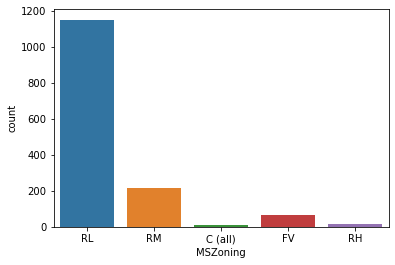

Street
0.0


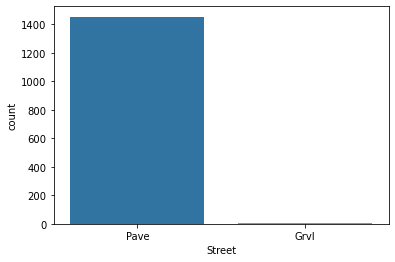

Alley
0.9376712328767123


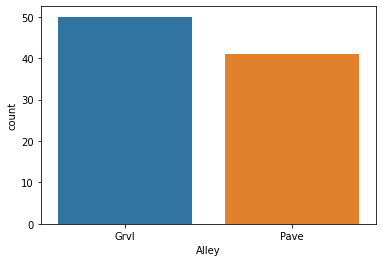

LotShape
0.0


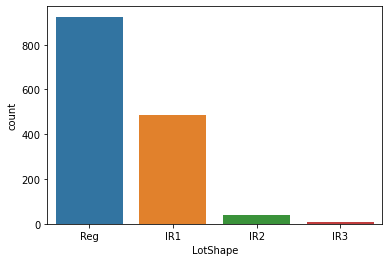

LandContour
0.0


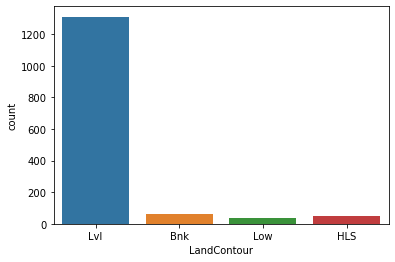

Utilities
0.0


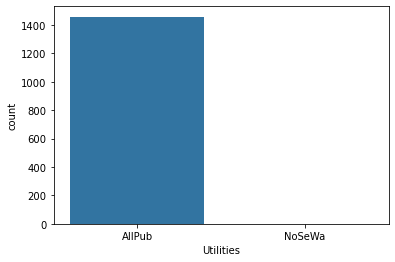

LotConfig
0.0


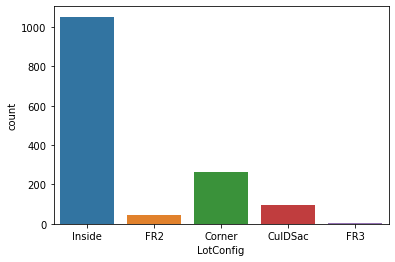

LandSlope
0.0


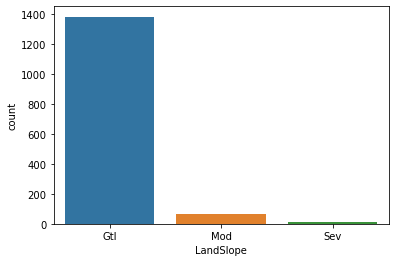

Neighborhood
0.0


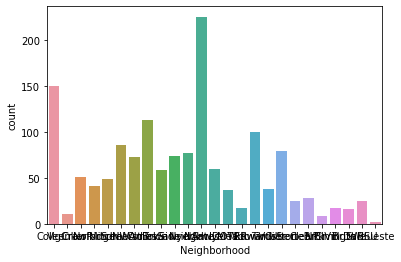

Condition1
0.0


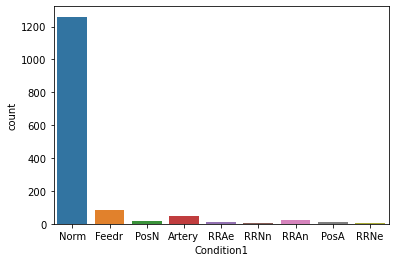

Condition2
0.0


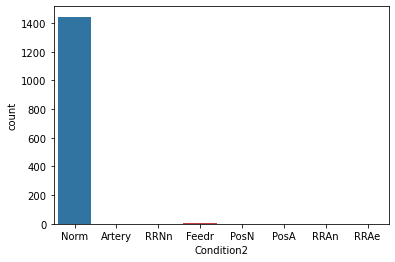

BldgType
0.0


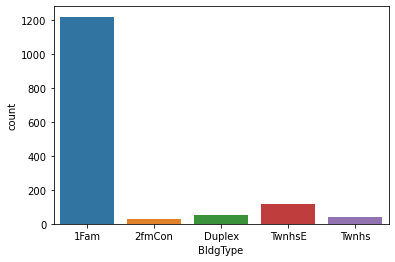

HouseStyle
0.0


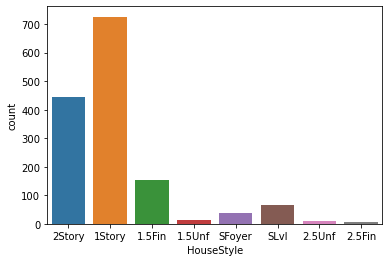

RoofStyle
0.0


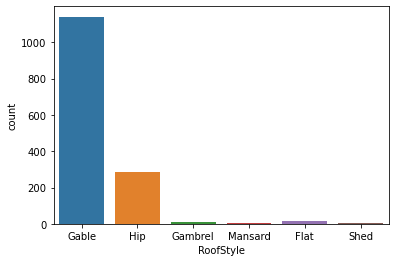

RoofMatl
0.0


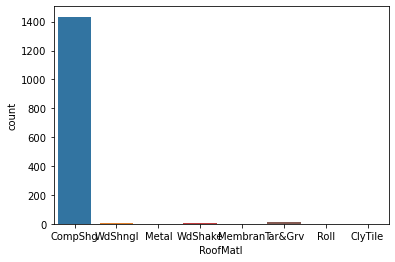

Exterior1st
0.0


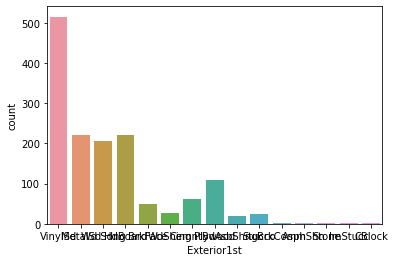

Exterior2nd
0.0


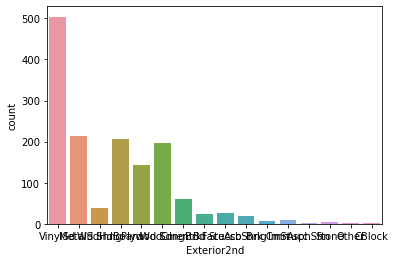

MasVnrType
0.005479452054794521


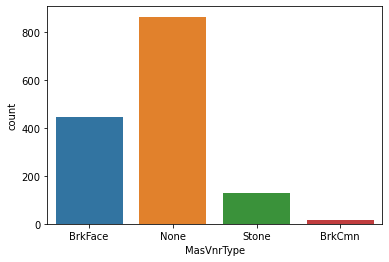

ExterQual
0.0


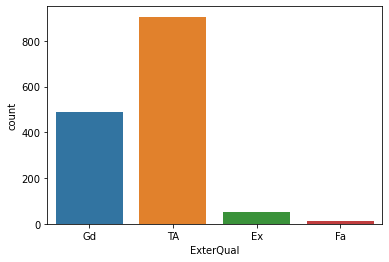

ExterCond
0.0


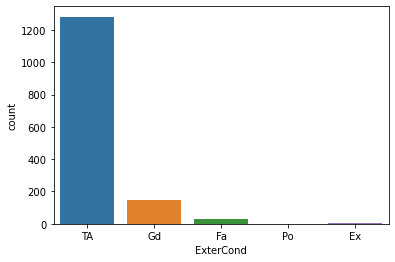

Foundation
0.0


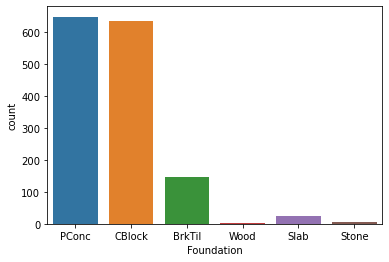

BsmtQual
0.025342465753424658


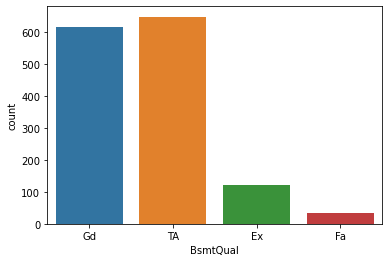

BsmtCond
0.025342465753424658


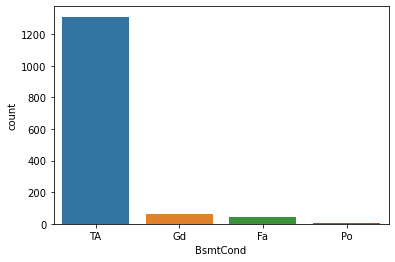

BsmtExposure
0.026027397260273973


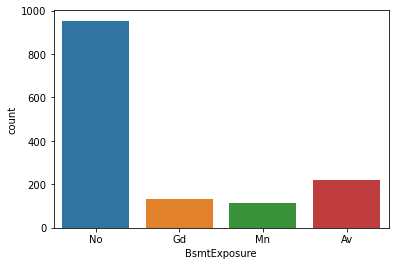

BsmtFinType1
0.025342465753424658


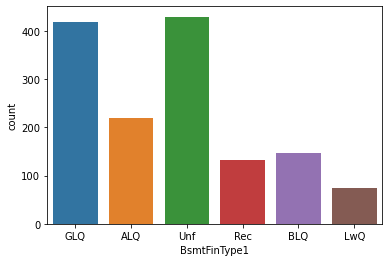

BsmtFinType2
0.026027397260273973


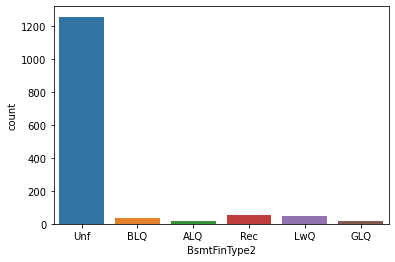

Heating
0.0


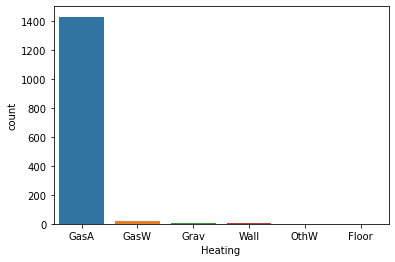

HeatingQC
0.0


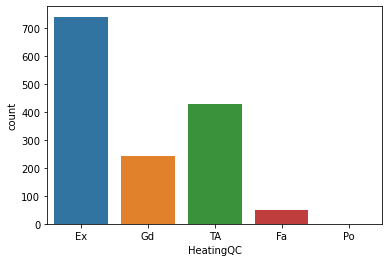

CentralAir
0.0


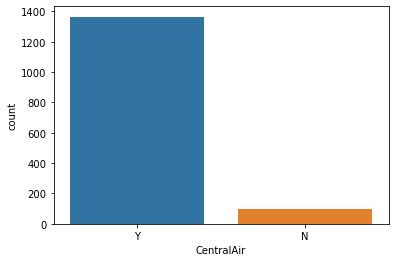

Electrical
0.0006849315068493151


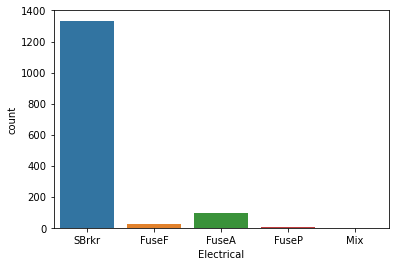

KitchenQual
0.0


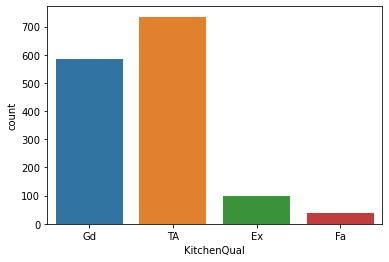

Functional
0.0


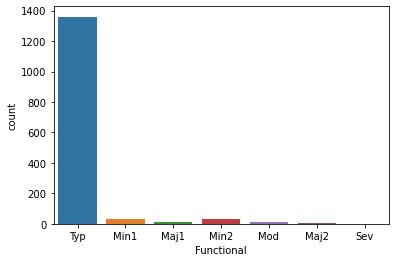

FireplaceQu
0.4726027397260274


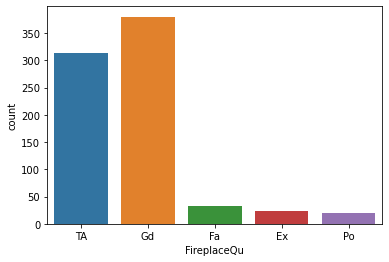

GarageType
0.05547945205479452


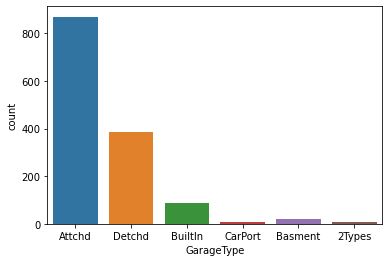

GarageFinish
0.05547945205479452


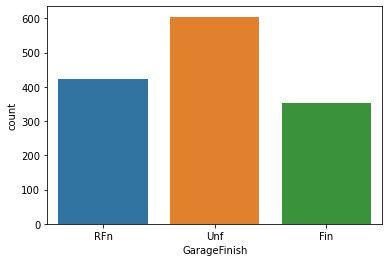

GarageQual
0.05547945205479452


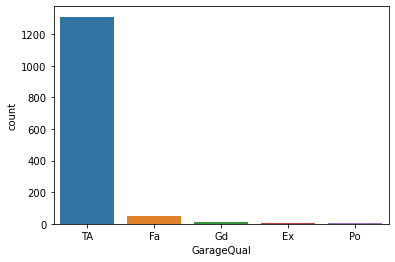

GarageCond
0.05547945205479452


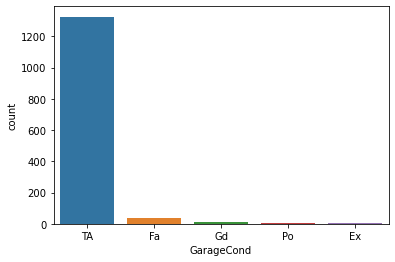

PavedDrive
0.0


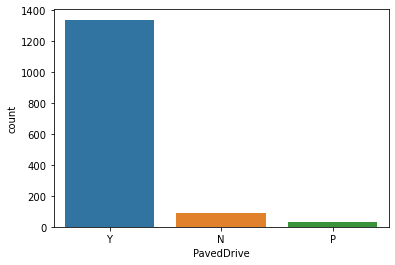

PoolQC
0.9952054794520548


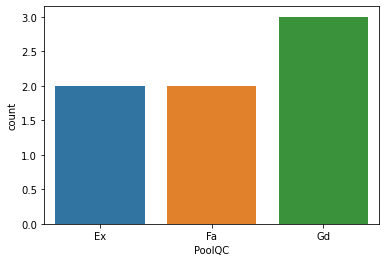

Fence
0.8075342465753425


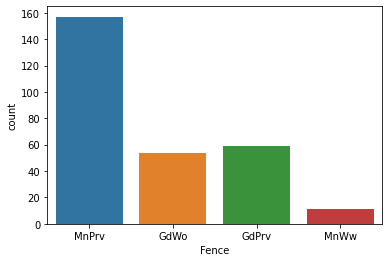

MiscFeature
0.963013698630137


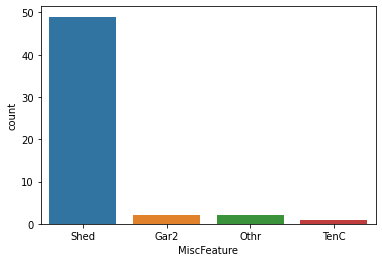

SaleType
0.0


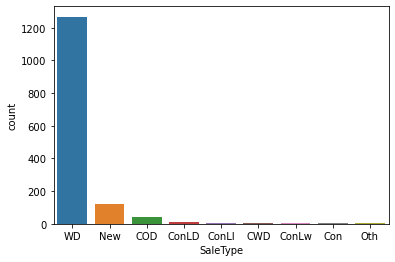

SaleCondition
0.0


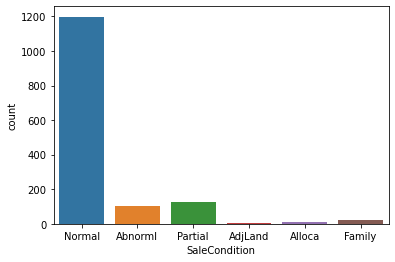

In [21]:
for column in housing.select_dtypes(include = ["object"]).columns:
    print(column)
    print(housing[column].isnull().mean())
    sns.countplot(data = housing, x = column)
    plt.show()

In [22]:
housing['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [23]:
# 

# Street - 100% is street
# Alley - 94% is null
# Utilities - all values are ALLPub except one
# MasVnrType - Impute - "None"
# BsmtQual - Impute - "TA"
# BsmtCond - "TA"
# BsmtExposure - "No"
# BsmtFinType2 =
